In [1]:
from lab4_proto import *
import torch

In [6]:
def test_strtoint():
    test_cases = [
        ( "abc", [2, 3, 4]),                  # Basic case
        ("zyx", [27, 26, 25]),               # Reverse order
        (" ' ", [1, 0, 1]),                  # Space and apostrophe
        ("aeims", [2, 6, 10, 14, 20]),       # Vowels
        ("" , []),                            # Empty list
        #("&", ['?']),                    # Invalid integers (handled gracefully)
        ("aaaa", [2, 2, 2, 2]),              # Repeating characters
        ("bcbc", [3, 4, 3, 4]),              # Alternating characters
        ("ijkl", [10, 11, 12, 13]),          # Sequence
    ]

    for i, (input_data, expected_output) in enumerate(test_cases):
        result = strToInt(input_data)
        assert result == expected_output, f"Test case {i} failed: {result} != {expected_output}"
        print(f"Test case {i} passed: {result} == {expected_output}")

test_strtoint()

Test case 0 passed: [2, 3, 4] == [2, 3, 4]
Test case 1 passed: [27, 26, 25] == [27, 26, 25]
Test case 2 passed: [1, 0, 1] == [1, 0, 1]
Test case 3 passed: [2, 6, 10, 14, 20] == [2, 6, 10, 14, 20]
Test case 4 passed: [] == []
Test case 5 passed: [2, 2, 2, 2] == [2, 2, 2, 2]
Test case 6 passed: [3, 4, 3, 4] == [3, 4, 3, 4]
Test case 7 passed: [10, 11, 12, 13] == [10, 11, 12, 13]


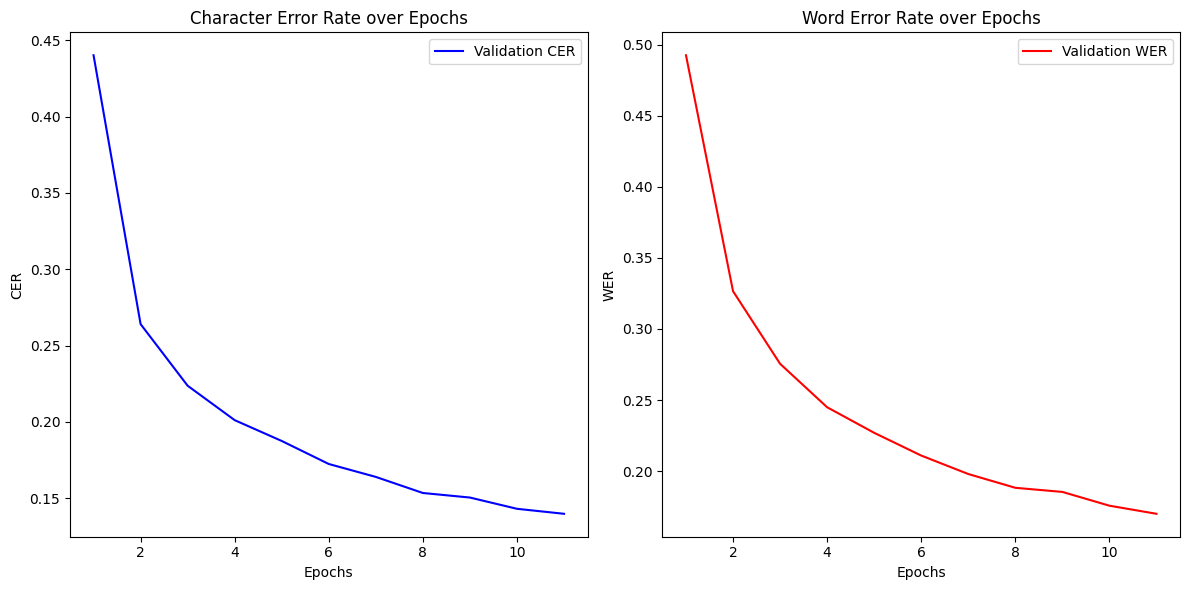

In [7]:
import matplotlib.pyplot as plt
val_losses = [1.8291, 1.1656 ,0.9710 ,0.0842 ,0.7895 ,0.7327 ,0.6870 ,0.6539 ,0.6361, 0.6175, 0.6026]
val_cers = [0.440123,0.264028 ,0.223672 ,0.201129 ,0.187491 ,0.172412 ,0.163948 ,0.153424 ,0.150442 ,0.143070 ,0.1398]
val_wers = [0.4927, 0.3266 ,0.2755 ,0.2449 ,0.2269 ,0.2109 ,0.1979 ,0.1882 ,0.1853 ,0.1756 ,0.1699]

# Number of epochs
epochs = range(1, len(val_losses) + 1)

# Plot CER and WER
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, val_cers, 'b', label='Validation CER')
plt.title('Character Error Rate over Epochs')
plt.xlabel('Epochs')
plt.ylabel('CER')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_wers, 'r', label='Validation WER')
plt.title('Word Error Rate over Epochs')
plt.xlabel('Epochs')
plt.ylabel('WER')
plt.legend()

plt.tight_layout()
plt.show()

with language model

In [13]:
!python lab4_main.py --mode recognize --model checkpoints/epoch-10.pt --wavfiles wanted.wav --decoder wiki

SpeechRecognitionModel(
  (cnn): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (rescnn_layers): Sequential(
    (0): ResidualCNN(
      (cnn1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (cnn2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (layer_norm1): CNNLayerNorm(
        (layer_norm): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
      )
      (layer_norm2): CNNLayerNorm(
        (layer_norm): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
      )
    )
    (1): ResidualCNN(
      (cnn1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (cnn2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (layer_norm1): CNNLayerNorm(
        (layer_norm): LayerNorm((40,),

Loading the LM will be faster if you build a binary file.
Reading c:\Users\A\Desktop\KTH\dt2119_speech_recpgmotopm\Speech-and-speaker-recognition\lab4\wiki-interpolate.3gram.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigrams and labels don't seem to agree.


greedy decoder

In [14]:
!python lab4_main.py --mode recognize --model checkpoints/epoch-10.pt --wavfiles wanted.wav --decoder greedy

SpeechRecognitionModel(
  (cnn): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (rescnn_layers): Sequential(
    (0): ResidualCNN(
      (cnn1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (cnn2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (layer_norm1): CNNLayerNorm(
        (layer_norm): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
      )
      (layer_norm2): CNNLayerNorm(
        (layer_norm): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
      )
    )
    (1): ResidualCNN(
      (cnn1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (cnn2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
      (layer_norm1): CNNLayerNorm(
        (layer_norm): LayerNorm((40,),

Reference:
Wanted: Chief Justice of the Massachusetts Supreme Court. In April, the S.J.C.'s current leader Edward Hennessy reaches the mandatory retirement age of seventy and a successor is exp..... 


(Greedy)
wavfile: wanted.wav


text: wante sheef ust as of he masi es at' uprem cort in aprl te as jaci's kurant leter eawadhenay reac es the maditory retirma ae of seventy and 'a successer is ex 

(language model)
wavfile: wanted.wav

text:  wante shef just as of the masi es at u prem cort in aperl the as jacis curant leter ead waeldhenasy rea                                                                                 ach es the maditory retirmemat ae of seventy and a suceser is ex

comment: language model is slightly better but not by much

In [ ]:
#find lowest wer
min_wer = 1e99
best_alpha, best_beta = None,None
for alpha in [0,0.5,1]:
    for beta in [0,0.5,1]:
        curr_wer = validate(model,"cuda:0",val_loader,criterion,alpha,beta)
        if  curr_wer < min_wer:
            min_wer = curr_wer
            best_alpha = alpha
            best_beta = beta
print(f"best alpha,beta is: {best_alpha},{best_beta} with avg min wer: {min_wer}")   

best alpha,beta is: 1,1 with min wer: 2.593229657003127

model improvements
- more sophisticated language model e.g. NN based or even LLM
- train ASR model for more epochs, it was still improving at 10
- pretraining with self-supervised learning on larger unlabeled audio dataset
- use larger dataset with multiple languages (prob needs larger model)
- more data augmentation! add background sounds of different character

In [25]:
x=torch.ones(15,498,29).argmax(dim=2)
for i in x:
    print(i.shape)

torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])
torch.Size([498])


In [ ]:
greedy:
Test set: Average loss: 10.3810, Average CER: 0.913204 Average WER: 2.7838
wiki:


`python lab4_main.py --mode test --model checkpoints/epoch-10.pt --decoder greedy`
evaluating…
100%|██████████████████████████████████████████████████████| 175/175 [00:43<00:00,  4.00it/s] 
Test set: Average loss: 10.3810, Average CER: 1.001334 Average WER: 1.0000

(tidig implementation: evaluating…
Test set: Average loss: 7.2654, Average CER: 2.071903 Average WER: 3.2626)


`python lab4_main.py --mode test --model checkpoints/epoch-10.pt --decoder wiki`
evaluating…
100%|██████████████████████████████████████████████████████| 175/175 [08:01<00:00,  2.75s/it]
Test set: Average loss: 10.3810, Average CER: 0.894223 Average WER: 2.6575